In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
red_wine_data = pd.read_csv("winequality-red.csv" ,sep=';')

In [3]:
white_wine_data = pd.read_csv("winequality-white.csv",sep=';')

In [4]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'

In [7]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [9]:
combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

In [10]:
combined_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [11]:
combined_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
combined_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [13]:
combined_wine_data.fillna(combined_wine_data.mean(), inplace=True)

/tmp/ipykernel_6713/3048870155.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_wine_data.fillna(combined_wine_data.mean(), inplace=True)


In [14]:
def handle_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores < threshold]

In [15]:
numeric_columns = combined_wine_data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    combined_wine_data[col] = handle_outliers_zscore(combined_wine_data[col])

In [16]:
combined_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,red
1,7.8,NaN,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,red
3,NaN,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,white


In [17]:
combined_wine_data.isnull().sum()

fixed acidity           128
volatile acidity         95
citric acid              28
residual sugar           26
chlorides               107
free sulfur dioxide      36
total sulfur dioxide      8
density                   3
pH                       33
sulphates                75
alcohol                   2
quality                  35
wine_type                 0
dtype: int64

In [18]:
combined_wine_data.fillna(combined_wine_data.mean(), inplace=True)

/tmp/ipykernel_6713/3048870155.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_wine_data.fillna(combined_wine_data.mean(), inplace=True)


In [19]:
combined_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

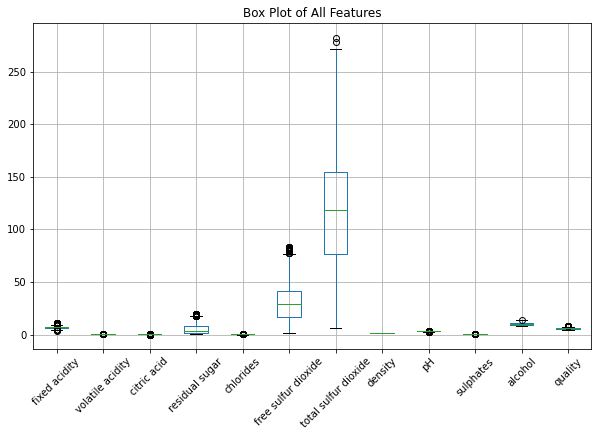

In [20]:
plt.figure(figsize=(10, 6))
combined_wine_data.boxplot()
plt.title("Box Plot of All Features")
plt.xticks(rotation=45)
plt.show()

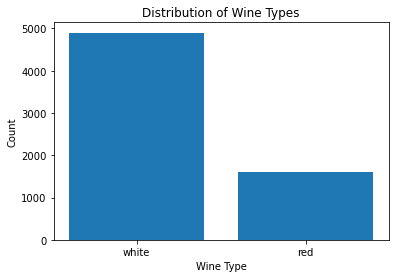

In [21]:
wine_type_counts = combined_wine_data['wine_type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(wine_type_counts.index, wine_type_counts.values)
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Distribution of Wine Types')
plt.show()

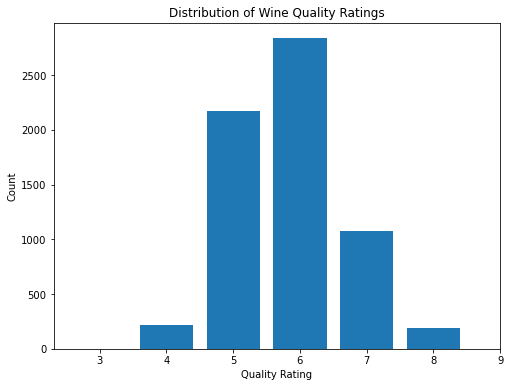

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(combined_wine_data['quality'], bins=range(3, 10), align='left', rwidth=0.8)
plt.xticks(range(3, 10))
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

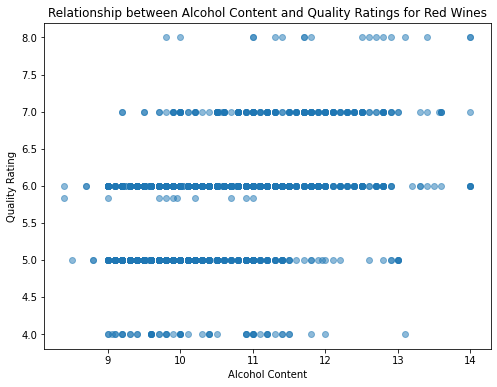

In [23]:
red_wine_data = combined_wine_data[combined_wine_data['wine_type'] == 'red']
plt.figure(figsize=(8, 6))
plt.scatter(red_wine_data['alcohol'], red_wine_data['quality'], alpha=0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Rating')
plt.title('Relationship between Alcohol Content and Quality Ratings for Red Wines')
plt.show()

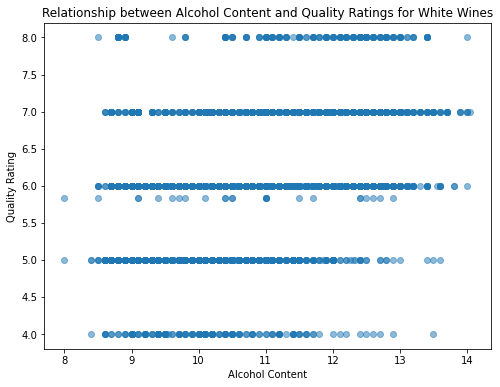

In [24]:
white_wine_data = combined_wine_data[combined_wine_data['wine_type'] == 'white']
plt.figure(figsize=(8, 6))
plt.scatter(white_wine_data['alcohol'], white_wine_data['quality'], alpha=0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Rating')
plt.title('Relationship between Alcohol Content and Quality Ratings for White Wines')
plt.show()

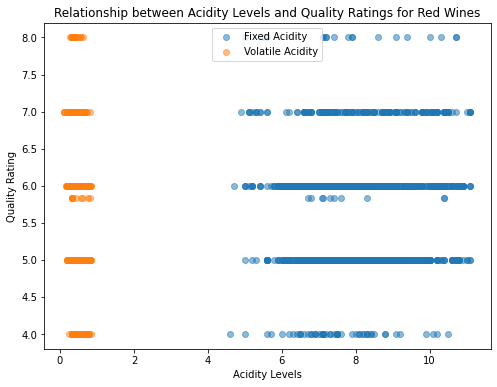

In [25]:
red_wine_data = combined_wine_data[combined_wine_data['wine_type'] == 'red']
plt.figure(figsize=(8, 6))
plt.scatter(red_wine_data['fixed acidity'], red_wine_data['quality'], alpha=0.5, label='Fixed Acidity')
plt.scatter(red_wine_data['volatile acidity'], red_wine_data['quality'], alpha=0.5, label='Volatile Acidity')
plt.xlabel('Acidity Levels')
plt.ylabel('Quality Rating')
plt.title('Relationship between Acidity Levels and Quality Ratings for Red Wines')
plt.legend()
plt.show()

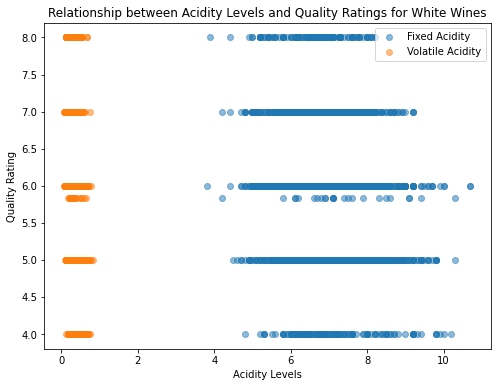

In [26]:
white_wine_data = combined_wine_data[combined_wine_data['wine_type'] == 'white']
plt.figure(figsize=(8, 6))
plt.scatter(white_wine_data['fixed acidity'], white_wine_data['quality'], alpha=0.5, label='Fixed Acidity')
plt.scatter(white_wine_data['volatile acidity'], white_wine_data['quality'], alpha=0.5, label='Volatile Acidity')
plt.xlabel('Acidity Levels')
plt.ylabel('Quality Rating')
plt.title('Relationship between Acidity Levels and Quality Ratings for White Wines')
plt.legend()
plt.show()

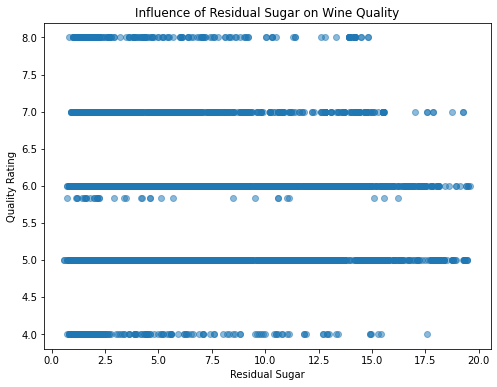

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(combined_wine_data['residual sugar'], combined_wine_data['quality'], alpha=0.5)
plt.xlabel('Residual Sugar')
plt.ylabel('Quality Rating')
plt.title('Influence of Residual Sugar on Wine Quality')
plt.show()

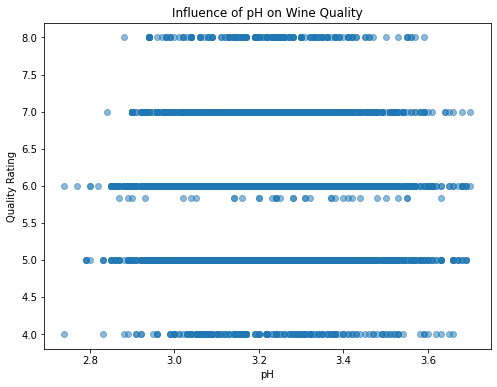

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(combined_wine_data['pH'], combined_wine_data['quality'], alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Quality Rating')
plt.title('Influence of pH on Wine Quality')
plt.show()

In [29]:
red_alcohol = combined_wine_data[combined_wine_data['wine_type'] == 'red']['alcohol']
white_alcohol = combined_wine_data[combined_wine_data['wine_type'] == 'white']['alcohol']

In [30]:
t_statistic, p_value = ttest_ind(red_alcohol, white_alcohol)
print(f"T-Test Results for Alcohol Content: t_statistic = {t_statistic}, p_value = {p_value}")

T-Test Results for Alcohol Content: t_statistic = -2.721732071546617, p_value = 0.006511395254618542


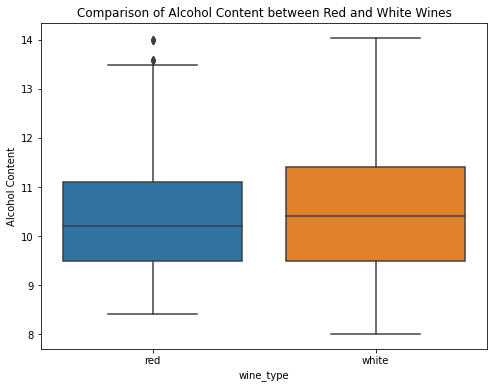

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='alcohol', data=combined_wine_data)
plt.ylabel('Alcohol Content')
plt.title('Comparison of Alcohol Content between Red and White Wines')
plt.show()

In [32]:
red_fixed_acidity = combined_wine_data[combined_wine_data['wine_type'] == 'red']['fixed acidity']
white_fixed_acidity = combined_wine_data[combined_wine_data['wine_type'] == 'white']['fixed acidity']

In [33]:
t_statistic, p_value = ttest_ind(red_fixed_acidity, white_fixed_acidity)
print(f"T-Test Results for Fixed Acidity: t_statistic = {t_statistic}, p_value = {p_value}")

T-Test Results for Fixed Acidity: t_statistic = 38.11337652976423, p_value = 4.937881099322877e-287


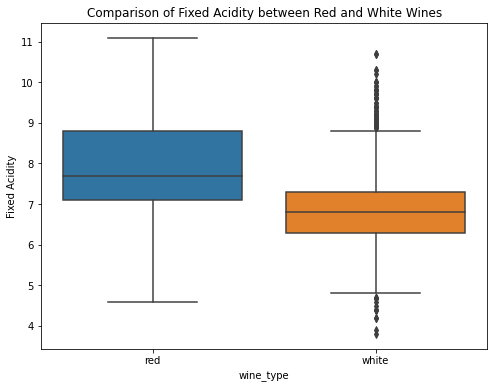

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='fixed acidity', data=combined_wine_data)
plt.ylabel('Fixed Acidity')
plt.title('Comparison of Fixed Acidity between Red and White Wines')
plt.show()

In [35]:
red_volatile_acidity = combined_wine_data[combined_wine_data['wine_type'] == 'red']['volatile acidity']
white_volatile_acidity = combined_wine_data[combined_wine_data['wine_type'] == 'white']['volatile acidity']

In [36]:
t_statistic, p_value = ttest_ind(red_volatile_acidity, white_volatile_acidity)
print(f"T-Test Results for Volatile Acidity: t_statistic = {t_statistic}, p_value = {p_value}")

T-Test Results for Volatile Acidity: t_statistic = 66.74772546432807, p_value = 0.0


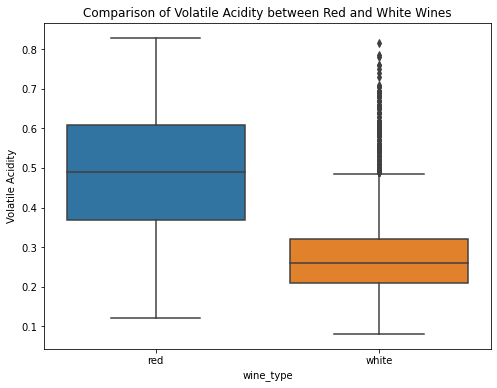

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='volatile acidity', data=combined_wine_data)
plt.ylabel('Volatile Acidity')
plt.title('Comparison of Volatile Acidity between Red and White Wines')
plt.show()

In [38]:
acidity_ranges = [(0, 6), (6, 7), (7, 8), (8, 15)]
alcohol_ranges = [(8, 10), (10, 11), (11, 12), (12, 15)]

In [39]:
def categorize_into_ranges(value, ranges):
    for i, (low, high) in enumerate(ranges):
        if low <= value < high:
            return f'{low}-{high}'
    return '>=15'

In [40]:
combined_wine_data['acidity_range'] = combined_wine_data['fixed acidity'].apply(lambda x: categorize_into_ranges(x, acidity_ranges))
combined_wine_data['alcohol_range'] = combined_wine_data['alcohol'].apply(lambda x: categorize_into_ranges(x, alcohol_ranges))

In [41]:
acidity_quality = combined_wine_data.groupby('acidity_range')['quality'].mean()

In [42]:
alcohol_quality = combined_wine_data.groupby('alcohol_range')['quality'].mean()

In [43]:
print("Mean Quality Ratings by Acidity Range:")
print(acidity_quality)

Mean Quality Ratings by Acidity Range:
acidity_range
0-6     6.040598
6-7     5.849096
7-8     5.814577
8-15    5.692905
Name: quality, dtype: float64


In [44]:
print("\nMean Quality Ratings by Alcohol Content Range:")
print(alcohol_quality)


Mean Quality Ratings by Alcohol Content Range:
alcohol_range
10-11    5.764697
11-12    6.142694
12-15    6.530292
8-10     5.463160
Name: quality, dtype: float64


In [45]:
correlation_with_quality = combined_wine_data.corr()['quality'].sort_values(ascending=False)

In [46]:
print("Correlation between Features and Wine Quality:")
correlation_with_quality

Correlation between Features and Wine Quality:


quality                 1.000000
alcohol                 0.450957
citric acid             0.091206
free sulfur dioxide     0.068381
sulphates               0.058419
pH                      0.022968
residual sugar         -0.036771
total sulfur dioxide   -0.040450
fixed acidity          -0.094701
volatile acidity       -0.238301
chlorides              -0.238318
density                -0.314156
Name: quality, dtype: float64

In [47]:
red_quality = combined_wine_data[combined_wine_data['wine_type'] == 'red']['quality']
white_quality = combined_wine_data[combined_wine_data['wine_type'] == 'white']['quality']

In [48]:
sns.set(style='whitegrid')

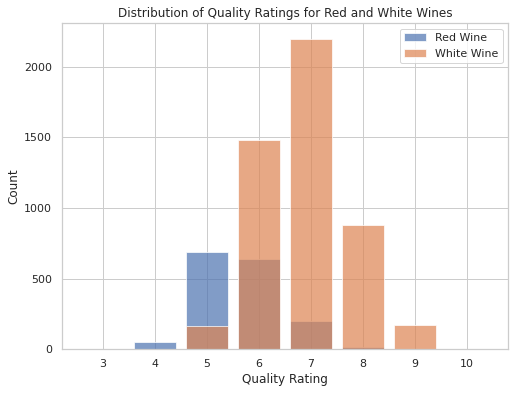

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(red_quality, bins=range(3, 11), align='left', alpha=0.7, rwidth=0.8, label='Red Wine')
plt.hist(white_quality, bins=range(3, 11), align='right', alpha=0.7, rwidth=0.8, label='White Wine')
plt.xticks(range(3, 11))
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('Distribution of Quality Ratings for Red and White Wines')
plt.legend()
plt.show()

In [50]:
correlation_matrix = combined_wine_data.corr()

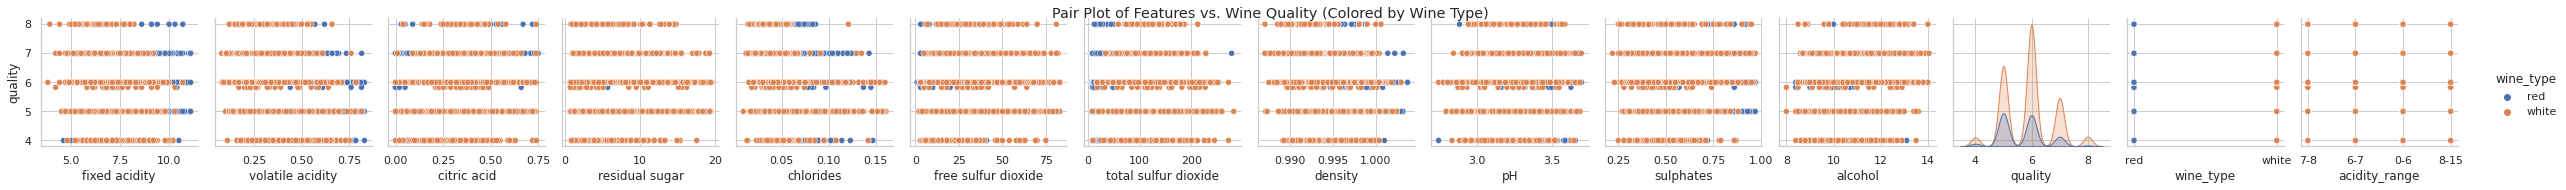

In [51]:
sns.pairplot(combined_wine_data, x_vars=combined_wine_data.columns[:-1], y_vars='quality', hue='wine_type', kind='scatter', diag_kind='kde')
plt.suptitle("Pair Plot of Features vs. Wine Quality (Colored by Wine Type)", y=1.02)
plt.show()

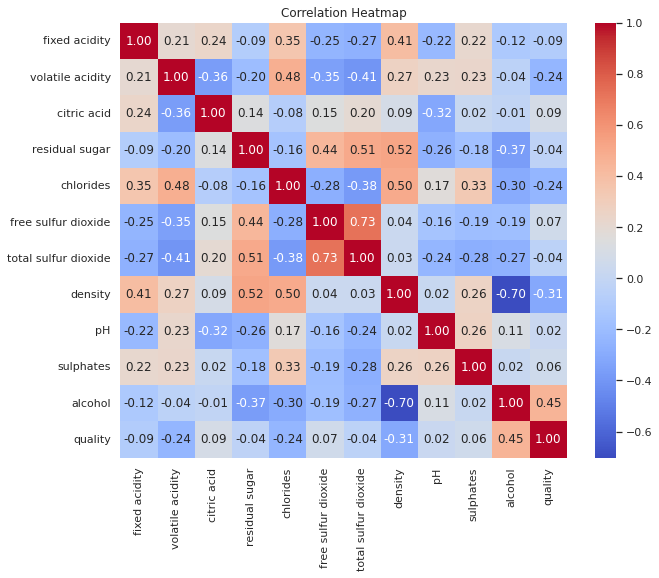

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()